In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_dir = "../data/gpu_training/12/bound"

generate_tex = False

In [3]:
# a = np.arange(1, 4.6, 0.1).reshape((-1))
# c = np.arange(0.5, 1.6, 0.1).reshape((-1))

In [4]:
a = [0.0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
     1.0 , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 
     2.0 , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 
     3.0 , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
     4.0 , 4.1, 4.2, 4.3, 4.4, 4.5]

c = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0 , 1.1, 1.2, 1.3, 1.4, 1.5]

In [5]:
dir_name = f"inference_vgp_0.001_{3.1}_{1.0}"
        
elbo_path = os.path.join(main_dir, "vgp_0.001", dir_name, "vgp_elbo.npz")
elbo = np.load(elbo_path)["elbo"][-1]
elbo

-57.15906327335177

In [6]:
dir_name = f"inference_ssm_0.01_{3.1}_{1.0}"
        
elbo_path = os.path.join(main_dir, "ssm_0.01", dir_name, "ssm_elbo.npz")
elbo = np.load(elbo_path)["elbo"][-1]
elbo

-61.547137617170456

In [7]:
dir_name = f"inference_ssm_0.001_{3.1}_{1.0}"
        
elbo_path = os.path.join(main_dir, "ssm_0.001", dir_name, "ssm_elbo.npz")
elbo = np.load(elbo_path)["elbo"][-1]
elbo

-59.26961975961811

In [8]:
elbo_vals_ssm_1 = []
elbo_vals_ssm_01 = []
elbo_vals_vgp_01 = []

for a_t in a:
    for c_t in c:
        dir_name = f"inference_ssm_0.01_{a_t}_{c_t}"
        elbo_path = os.path.join(main_dir, "ssm_0.01", dir_name, "ssm_elbo.npz")
        elbo = np.load(elbo_path)["elbo"][-1]
        elbo_vals_ssm_1.append(elbo)
        
        dir_name = f"inference_ssm_0.001_{a_t}_{c_t}"    
        elbo_path = os.path.join(main_dir, "ssm_0.001", dir_name, "ssm_elbo.npz")
        elbo = np.load(elbo_path)["elbo"][-1]
        elbo_vals_ssm_01.append(elbo)
        
        dir_name = f"inference_vgp_0.001_{a_t}_{c_t}"
        elbo_path = os.path.join(main_dir, "vgp_0.001", dir_name, "vgp_elbo.npz")
        if os.path.exists(elbo_path):
            elbo = np.load(elbo_path)["elbo"][-1]
        else:
            print(f"Doesn't exist {elbo_path}")
            elbo = -100
    
        elbo_vals_vgp_01.append(elbo)
    

Doesn't exist ../data/gpu_training/12/bound/vgp_0.001/inference_vgp_0.001_4.0_1.5/vgp_elbo.npz


In [9]:
np.max(elbo_vals_ssm_1), np.max(elbo_vals_ssm_01), np.max(elbo_vals_vgp_01)

(-60.40109118942674, -58.83702337532107, -57.132844734807726)

In [10]:
np.min(elbo_vals_ssm_1), np.min(elbo_vals_ssm_01), np.min(elbo_vals_vgp_01)

(-110.9164081034914, -112.00318230779516, -103.22616903170245)

In [11]:
elbo_vals_ssm_1 = np.array(elbo_vals_ssm_1).reshape((len(a), len(c)))
elbo_vals_ssm_01 = np.array(elbo_vals_ssm_01).reshape((len(a), len(c)))
elbo_vals_vgp_01 = np.array(elbo_vals_vgp_01).reshape((len(a), len(c)))

In [12]:
# elbo_vals_ssm_1 = np.clip(elbo_vals_ssm_1, -100, np.max(elbo_vals_ssm_1))
levels_ssm = np.linspace(np.min(elbo_vals_ssm_1), np.max(elbo_vals_ssm_1), 25)

In [13]:
# elbo_vals_ssm_01 = np.clip(elbo_vals_ssm_01, -100, np.max(elbo_vals_ssm_01))
levels_ssm_01 = np.linspace(np.min(elbo_vals_ssm_01), np.max(elbo_vals_ssm_01), 25)

In [14]:
ssm_max_idx = np.unravel_index(np.argmax(elbo_vals_ssm_1), np.array(elbo_vals_ssm_1).shape)
vgp_max_idx = np.unravel_index(np.argmax(elbo_vals_vgp_01), np.array(elbo_vals_vgp_01).shape)

In [15]:
a[ssm_max_idx[0]], c[ssm_max_idx[1]]

(2.3, 0.9)

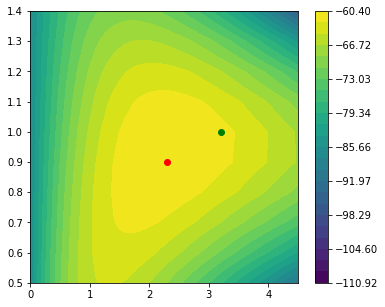

In [16]:
fig1 = plt.figure(1, figsize=(6, 5))

contour1 = plt.contourf(a, c, np.transpose(elbo_vals_ssm_1), levels=levels_ssm)
fig1.colorbar(contour1)
plt.scatter(a[ssm_max_idx[0]], c[ssm_max_idx[1]], color="red")
plt.scatter(a[vgp_max_idx[0]], c[vgp_max_idx[1]], color="green")

plt.xlim([0.0, 4.5])
plt.ylim([0.5, 1.4])

plt.show()

In [17]:
ssm_max_idx_01 = np.unravel_index(np.argmax(elbo_vals_ssm_01), np.array(elbo_vals_ssm_01).shape)

In [18]:
a[ssm_max_idx_01[0]], c[ssm_max_idx_01[1]]

(2.6, 0.9)

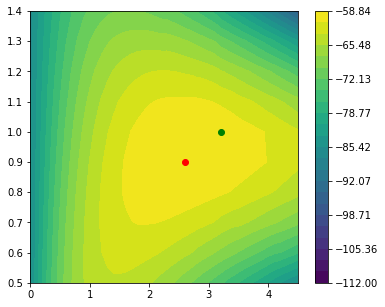

In [19]:
fig1 = plt.figure(1, figsize=(6, 5))

contour1 = plt.contourf(a, c, np.transpose(elbo_vals_ssm_01), levels=levels_ssm_01)

plt.scatter(a[ssm_max_idx_01[0]], c[ssm_max_idx_01[1]], color="red")
plt.scatter(a[vgp_max_idx[0]], c[vgp_max_idx[1]], color="green")


fig1.colorbar(contour1)

plt.xlim([0.0, 4.5])
plt.ylim([0.5, 1.4])

plt.show()

In [20]:
# elbo_vals_vgp_01 = np.clip(elbo_vals_vgp_01, -100, np.max(elbo_vals_vgp_01))
levels_vgp = np.linspace(np.min(elbo_vals_vgp_01), np.max(elbo_vals_vgp_01), 25)

In [21]:
a[vgp_max_idx[0]], c[vgp_max_idx[1]]

(3.2, 1.0)

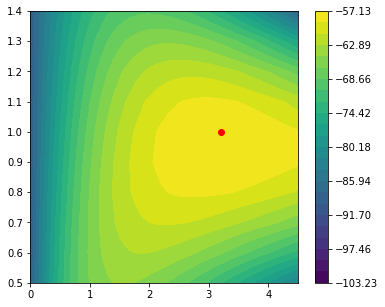

In [22]:
fig1 = plt.figure(1, figsize=(6, 5))

contour1 = plt.contourf(a, c, np.transpose(elbo_vals_vgp_01), levels=levels_vgp)
fig1.colorbar(contour1)
plt.scatter(a[vgp_max_idx[0]], c[vgp_max_idx[1]], color="red")

plt.xlim([0.0, 4.5])
plt.ylim([0.5, 1.4])

plt.show()

## Plotting together

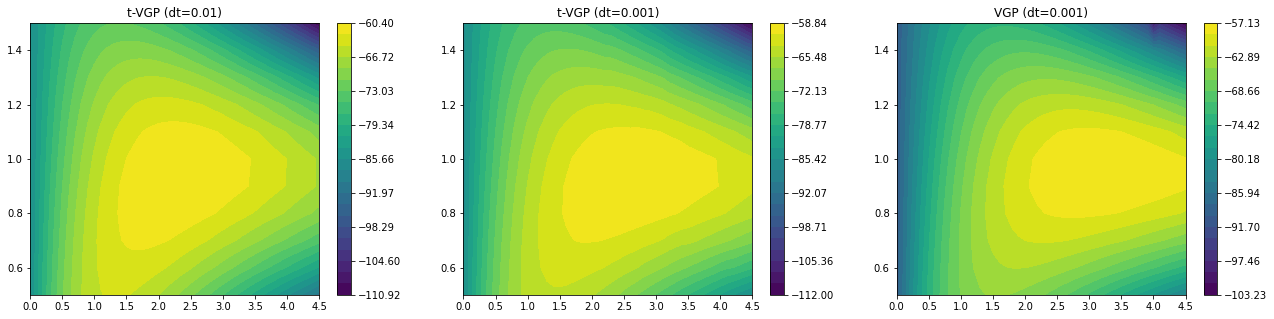

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(22, 5))

contour1 = axs[0].contourf(a, c, np.transpose(elbo_vals_ssm_1), levels=levels_ssm)
fig.colorbar(contour1, ax=axs[0])
axs[0].set_title("t-VGP (dt=0.01)")

contour1 = axs[1].contourf(a, c, np.transpose(elbo_vals_ssm_01), levels=levels_ssm_01)
fig.colorbar(contour1, ax=axs[1])
axs[1].set_title("t-VGP (dt=0.001)")

contour1 = axs[2].contourf(a, c, np.transpose(elbo_vals_vgp_01), levels=levels_vgp)
fig.colorbar(contour1, ax=axs[2])
axs[2].set_title("VGP (dt=0.001)")

plt.show()

## Plot trajectory

In [24]:
# ssm_1_path = os.path.join("../data/gpu_training/12", "learning_0.01", "ssm_m_step.npz")
ssm_1_path = os.path.join("../data/gpu_training/12", "learning_test", "ssm_m_step.npz")

ssm_1_a = np.load(ssm_1_path)["a"]
ssm_1_c = np.load(ssm_1_path)["c"]

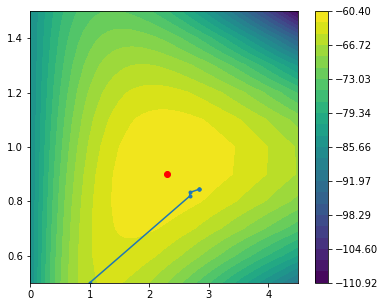

In [25]:
fig1 = plt.figure(1, figsize=(6, 5))

plt.plot(ssm_1_a, ssm_1_c, ".-")

contour1 = plt.contourf(a, c, np.transpose(elbo_vals_ssm_1), levels=levels_ssm)
fig1.colorbar(contour1)
plt.scatter(a[ssm_max_idx[0]], c[ssm_max_idx[1]], color="red")
# plt.xlim([2.0, 3.0])
# plt.ylim([0.8, 1.1])

plt.show()

In [26]:
vgp_1_path = os.path.join("../data/gpu_training/12", "learning_0.001", "vgp_m_step.npz")

vgp_1_a = np.load(vgp_1_path)["a"]
vgp_1_c = np.load(vgp_1_path)["c"]


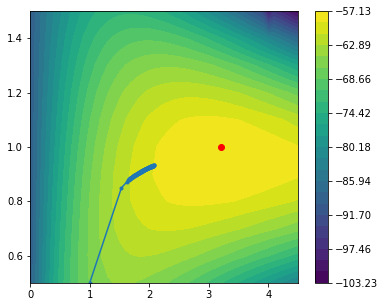

In [27]:
fig1 = plt.figure(1, figsize=(6, 5))

plt.plot(vgp_1_a, vgp_1_c, ".-")

contour1 = plt.contourf(a, c, np.transpose(elbo_vals_vgp_01), levels=levels_vgp)
plt.scatter(a[vgp_max_idx[0]], c[vgp_max_idx[1]], color="red")
fig1.colorbar(contour1)
# plt.xlim([0.0, 3.0])
# plt.ylim([0.5, 1.4])

plt.show()

In [30]:
len(vgp_1_a)

145

## Plot Debugging

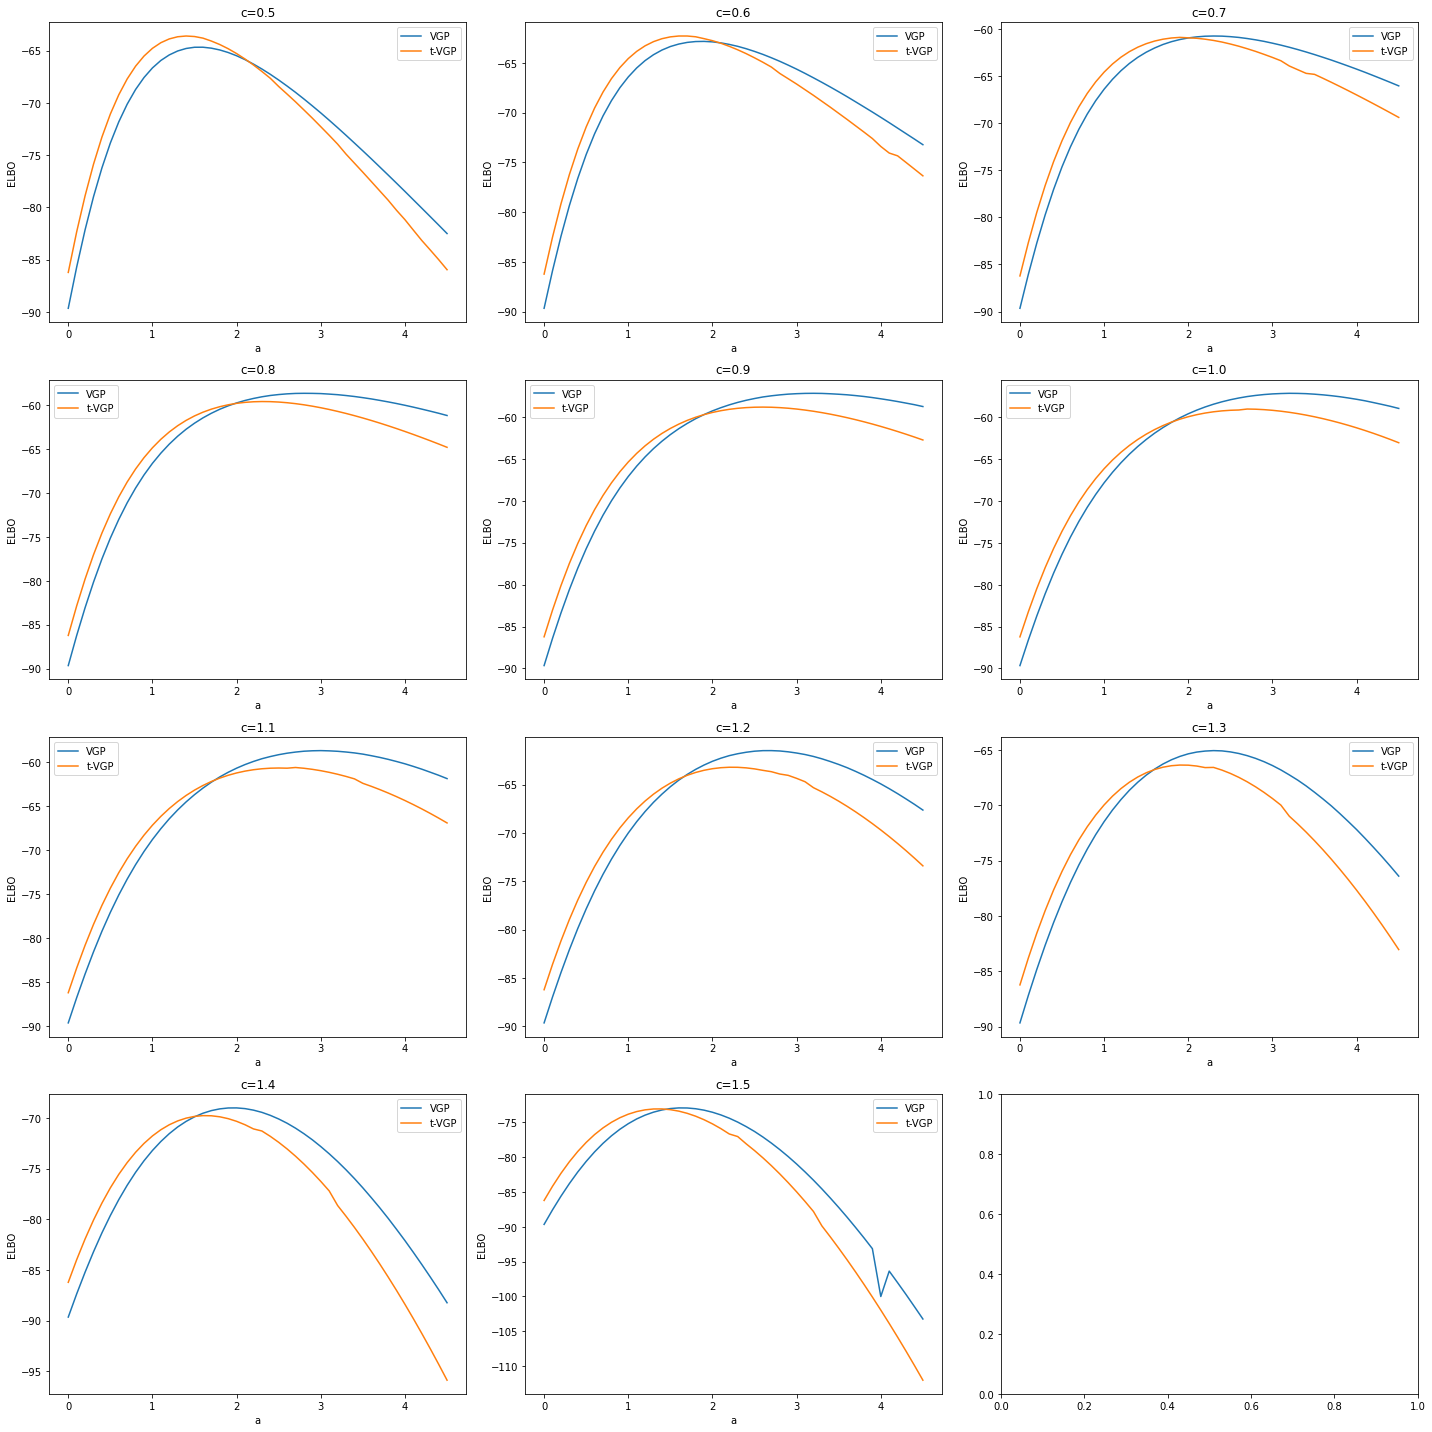

In [28]:
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i in range(elbo_vals_vgp_01.shape[1]):
    
    row = int(i//3)
    cols = int(i%3)
    
    axs[row][cols].plot(a, elbo_vals_vgp_01[:, i], label="VGP")
    axs[row][cols].plot(a, elbo_vals_ssm_01[:, i], label="t-VGP")
    
    axs[row][cols].set_xlabel("a")
    axs[row][cols].set_ylabel("ELBO")
    
    axs[row][cols].legend()
    
    axs[row][cols].set_title("c=" + str(c[i]))
    
plt.tight_layout()

# plt.savefig("elbo_bound_c.pdf")
plt.show()

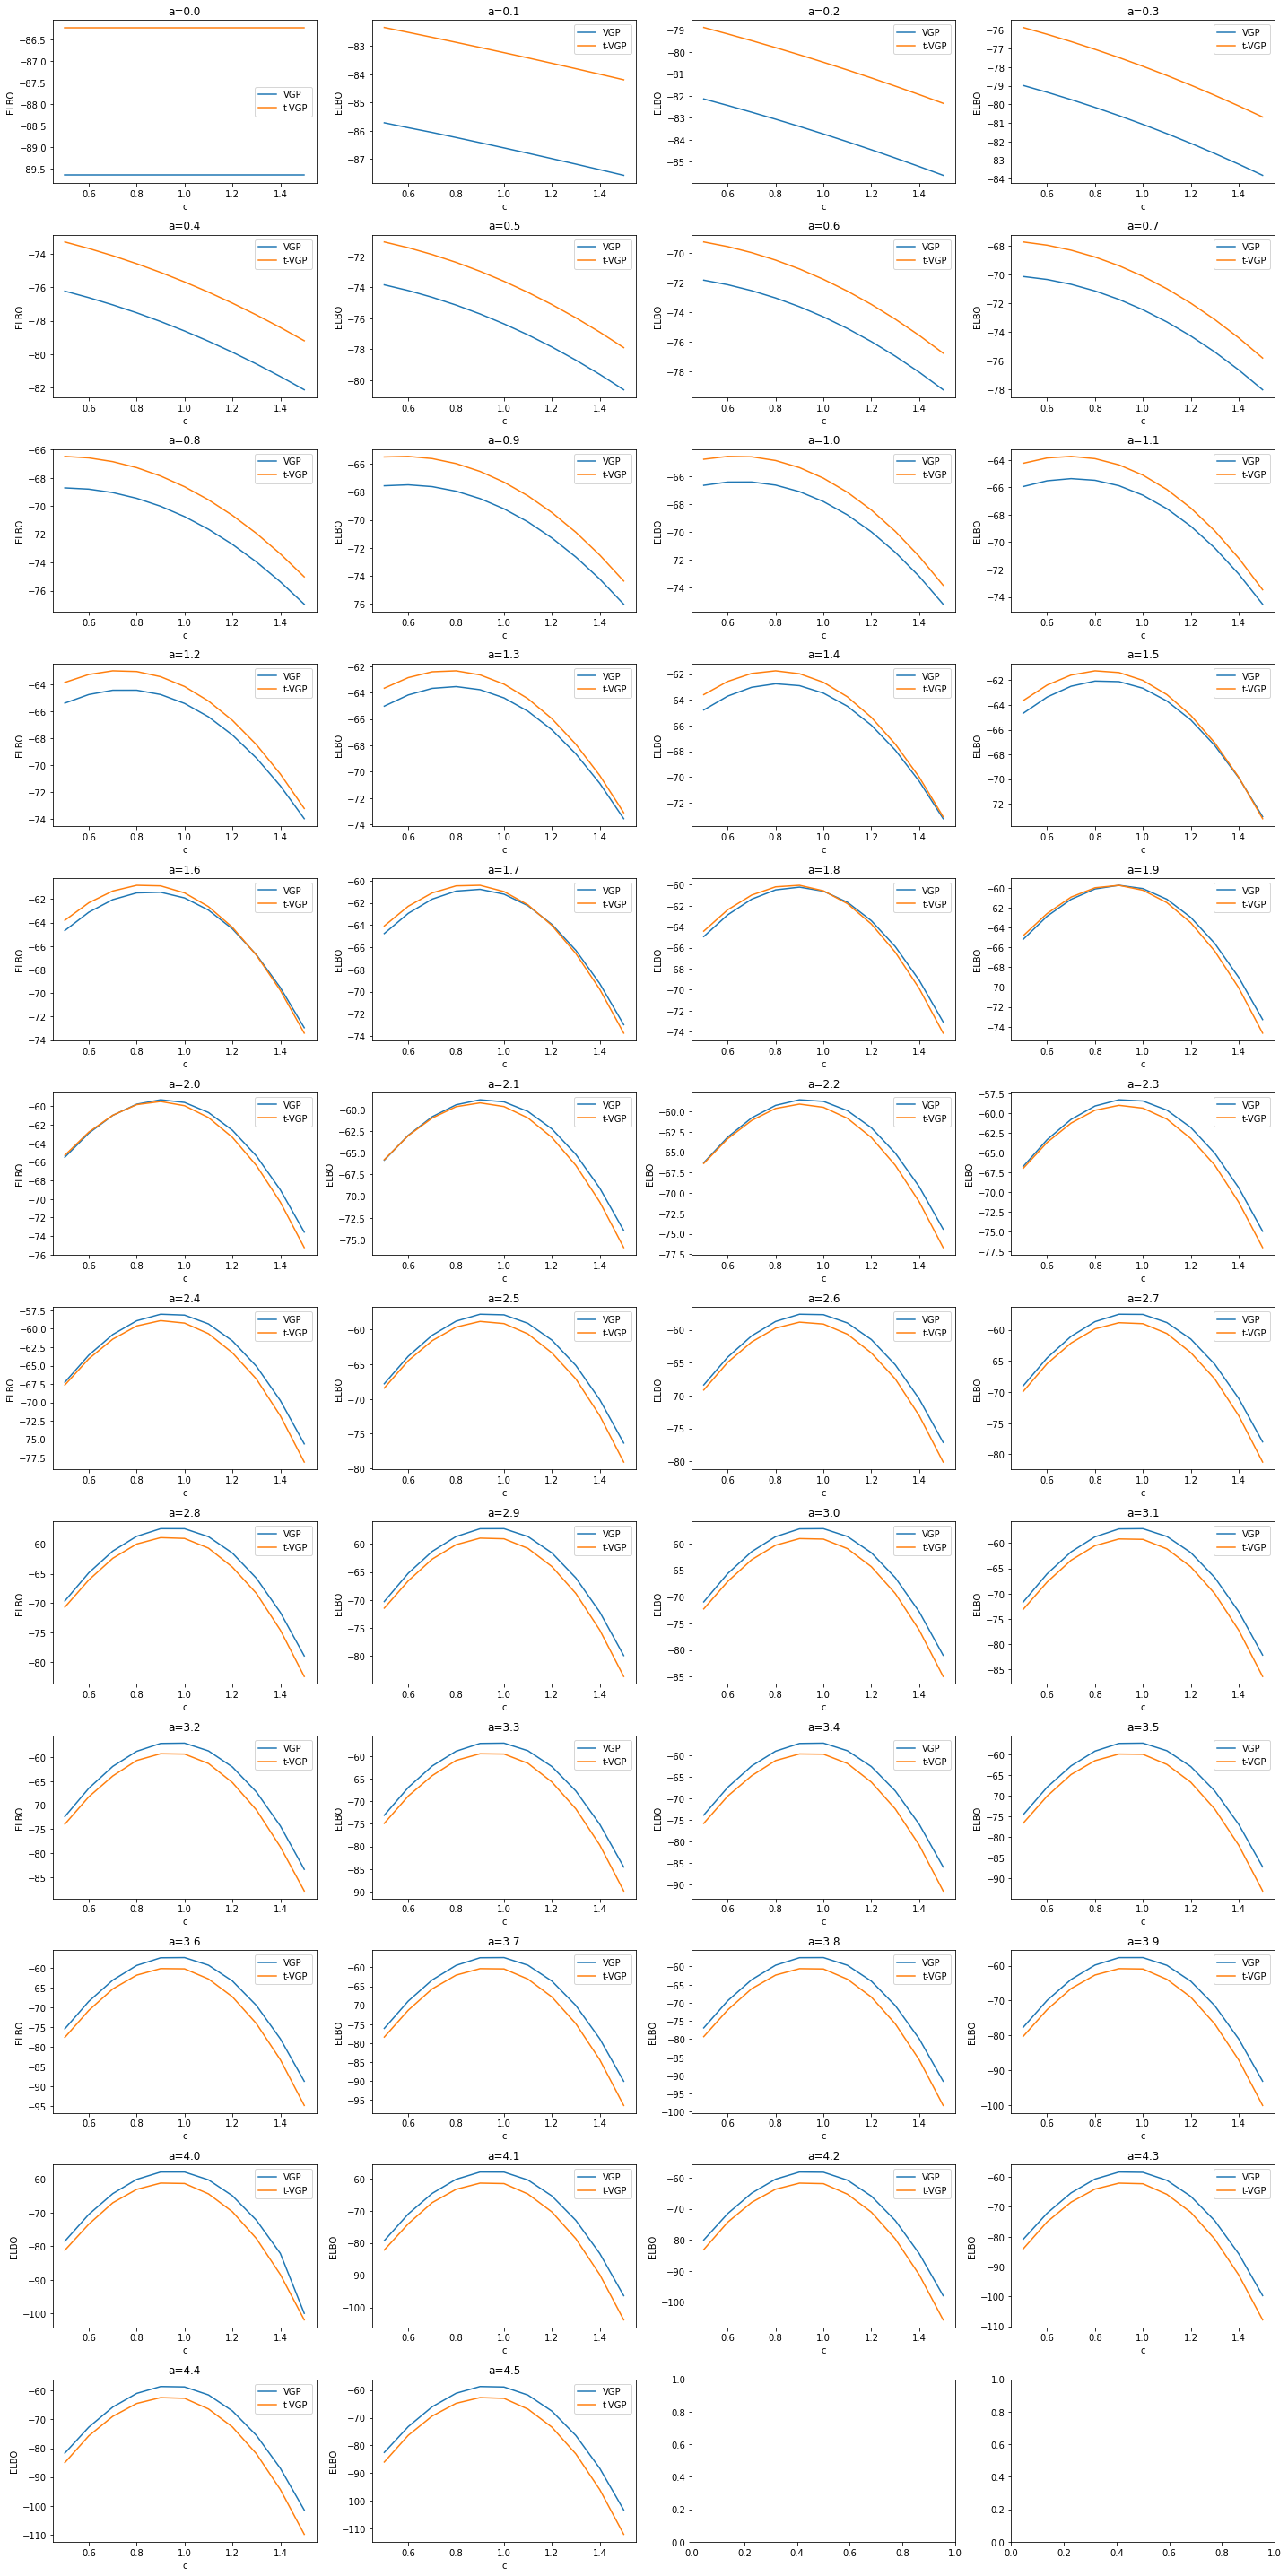

In [29]:
fig, axs = plt.subplots(12, 4, figsize=(20, 40))

for i in range(elbo_vals_vgp_01.shape[0]):
    
    row = int(i//4)
    cols = int(i%4)
    
    axs[row][cols].plot(c, elbo_vals_vgp_01[i], label="VGP")
    axs[row][cols].plot(c, elbo_vals_ssm_01[i], label="t-VGP")
    
    axs[row][cols].set_xlabel("c")
    axs[row][cols].set_ylabel("ELBO")
    
    axs[row][cols].legend()
    
    axs[row][cols].set_title("a=" + str(a[i]))
    
plt.tight_layout()
# plt.savefig("elbo_bound_a.pdf")
plt.show()